In [2]:
import sys
import torch
sys.path.append('cocoapi\PythonAPI')
from pycocotools.coco import COCO
from data_loader import get_loader
from torchvision import transforms

# TODO #1: Define a transform to pre-process the testing images.
transform_test = transforms.Compose([ 
    transforms.Resize(256),                          
    transforms.CenterCrop(224),                             
    transforms.ToTensor(),                           
    transforms.Normalize((0.485, 0.456, 0.406),      
                         (0.229, 0.224, 0.225))])

#-#-#-# Do NOT modify the code below this line. #-#-#-#
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Create the data loader.
data_loader = get_loader(transform=transform_test,    
                         mode='test')

Vocabulary successfully loaded from vocab.pkl file!


In [4]:
device

device(type='cuda')

In [6]:
def clean_sentence(output):
    sentence = ""
    for idx in output:
        if idx == 0:
            continue
        if idx == 1:
            break
        word = data_loader.dataset.vocab.idx2word[idx]
        sentence = sentence + word + ' '
        
    return sentence

In [5]:
from PIL import Image
def fetch_image(file_name):
    orig_image = Image.open(file_name).convert('RGB')
    plt.imshow(np.squeeze(orig_image))
    plt.title('Sample Image')
    plt.show()
    transform_test = transforms.Compose([ 
        transforms.Resize(256),                          
        transforms.CenterCrop(224),                             
        transforms.ToTensor(),                           
        transforms.Normalize((0.485, 0.456, 0.406),      
                             (0.229, 0.224, 0.225))])
    input_image = transform_test(orig_image)
    return orig_image, input_image

def generate_caption(input_image):
    print(input_image.shape)
    features = encoder(input_image).unsqueeze(1)
    features.to(device)
#     print(features.shape)
    output = decoder.sample(features)    
    sentence = clean_sentence(output)
    print(sentence)

ORIGINAL IMAGE

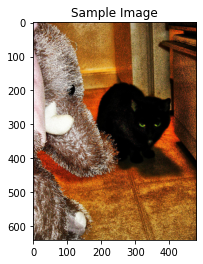

In [8]:
import os
import matplotlib.pyplot as plt
import numpy as np
address = os.path.join(os.getcwd(),'images','cat.jpg')
orig_image, input_image = fetch_image(address)

5 BLOCKS

In [15]:
%load_ext autoreload
%autoreload 2

import os
import torch
from model import EncoderCNN, DecoderRNN

# TODO #2: Specify the saved models to load.
encoder_file_5_layers = 'comparitive_encoder_4-1.pkl'
decoder_file_5_layers = 'comparitive_decoder_4-1.pkl'

# TODO #3: Select appropriate values for the Python variables below.
embed_size = 512
hidden_size = 512

# The size of the vocabulary.
vocab_size = len(data_loader.dataset.vocab)
encoder = EncoderCNN(embed_size)
encoder.eval()
decoder = DecoderRNN(embed_size, hidden_size, vocab_size)
decoder.eval()
encoder.to(device)
decoder.to(device)
encoder.load_state_dict(torch.load(os.path.join(os.getcwd(),'models', encoder_file_5_layers)))
decoder.load_state_dict(torch.load(os.path.join(os.getcwd(),'models', decoder_file_5_layers)))

5 64


<All keys matched successfully>

In [20]:
encoder.resnet

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): AdaptiveAvgPool2d(output_size=(1, 1))
)

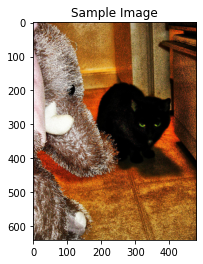

torch.Size([1, 3, 224, 224])
a man is holding a baseball bat in front of a crowd . 


In [25]:
address = os.path.join(os.getcwd(),'images','cat.jpg')
orig_image, input_image = fetch_image(address)
generate_caption(input_image.reshape(1,3,224,224).to('cuda'))

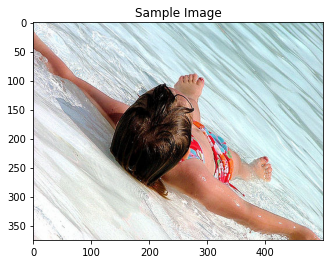

torch.Size([1, 3, 224, 224])
a man is doing a trick on a skateboard . 


In [26]:
address = os.path.join(os.getcwd(),'images','child.jpg')
orig_image, input_image = fetch_image(address)
generate_caption(input_image.reshape(1,3,224,224).to('cuda'))

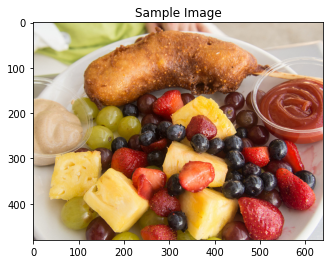

torch.Size([1, 3, 224, 224])
a plate of food with a sandwich and french fries . 


In [21]:
address = os.path.join(os.getcwd(),'images','fruits.jpg')
orig_image, input_image = fetch_image(address)
generate_caption(input_image.reshape(1,3,224,224).to('cuda'))

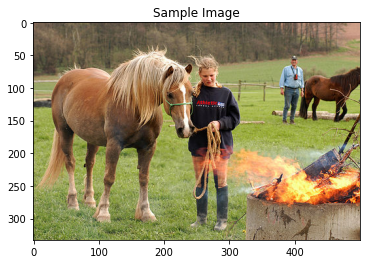

torch.Size([1, 3, 224, 224])
a giraffe standing in a field near a tree . 


In [27]:
address = os.path.join(os.getcwd(),'images','horse_girl.jpg')
orig_image, input_image = fetch_image(address)
generate_caption(input_image.reshape(1,3,224,224).to('cuda'))

6 BLOCKS

In [3]:
# Watch for any changes in model.py, and re-load it automatically.
%load_ext autoreload
# %autoreload 2


import os
import torch
from model import EncoderCNN, DecoderRNN

# TODO #2: Specify the saved models to load.
encoder_file_6_layers = 'comparitive_encoder_3-1.pkl'
decoder_file_6_layers = 'comparitive_decoder_3-1.pkl'

# TODO #3: Select appropriate values for the Python variables below.
embed_size = 512
hidden_size = 512

# The size of the vocabulary.
vocab_size = len(data_loader.dataset.vocab)
encoder = EncoderCNN(embed_size)
encoder.eval()
decoder = DecoderRNN(embed_size, hidden_size, vocab_size)
decoder.eval()
encoder.to(device)
decoder.to(device)
encoder.load_state_dict(torch.load(os.path.join(os.getcwd(),'models', encoder_file_6_layers)))
decoder.load_state_dict(torch.load(os.path.join(os.getcwd(),'models', decoder_file_6_layers)))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
6 256


<All keys matched successfully>

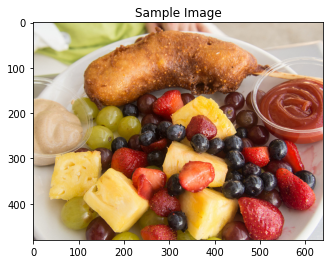

torch.Size([1, 3, 224, 224])
a plate of food with a fork and a sandwich on it . 


In [10]:
address = os.path.join(os.getcwd(),'images','fruits.jpg')
orig_image, input_image = fetch_image(address)
generate_caption(input_image.reshape(1,3,224,224).to('cuda'))

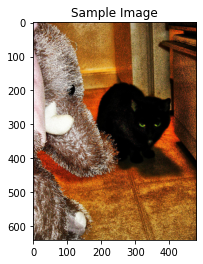

torch.Size([1, 3, 224, 224])
a cat laying on a couch with a stuffed animal . 


In [9]:
address = os.path.join(os.getcwd(),'images','cat.jpg')
orig_image, input_image = fetch_image(address)
generate_caption(input_image.reshape(1,3,224,224).to('cuda'))

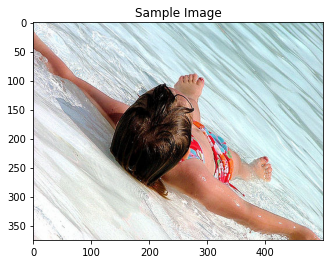

torch.Size([1, 3, 224, 224])
a cat laying on a laptop computer on a desk . 


In [11]:
address = os.path.join(os.getcwd(),'images','child.jpg')
orig_image, input_image = fetch_image(address)
generate_caption(input_image.reshape(1,3,224,224).to('cuda'))

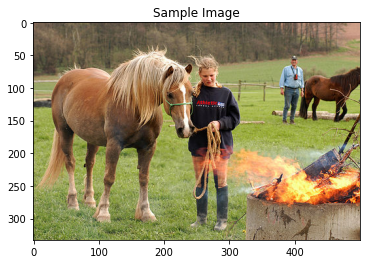

torch.Size([1, 3, 224, 224])
a man in a suit and tie standing in front of a large building . 


In [12]:
address = os.path.join(os.getcwd(),'images','horse_girl.jpg')
orig_image, input_image = fetch_image(address)
generate_caption(input_image.reshape(1,3,224,224).to('cuda'))

7 BLOCKS

In [14]:
%load_ext autoreload
%autoreload 2
import os
import torch
from model import EncoderCNN, DecoderRNN
encoder_file_7_layers = 'comparitive_encoder_2-1.pkl'
decoder_file_7_layers = 'comparitive_decoder_2-1.pkl'
encoder = EncoderCNN(embed_size)
encoder.eval()
decoder = DecoderRNN(embed_size, hidden_size, vocab_size)
decoder.eval()
encoder.to(device)
decoder.to(device)
encoder.load_state_dict(torch.load(os.path.join(os.getcwd(),'models', encoder_file_7_layers)))
decoder.load_state_dict(torch.load(os.path.join(os.getcwd(),'models', decoder_file_7_layers)))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
7 512


<All keys matched successfully>

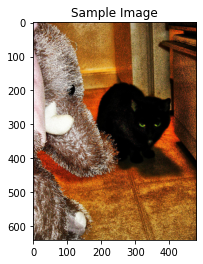

torch.Size([1, 3, 224, 224])
a cat is laying on a bed with a stuffed animal . 


In [15]:
address = os.path.join(os.getcwd(),'images','cat.jpg')
orig_image, input_image = fetch_image(address)
generate_caption(input_image.reshape(1,3,224,224).to('cuda'))

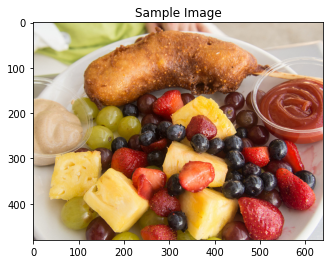

torch.Size([1, 3, 224, 224])
a plate of food with a sandwich and a salad . 


In [16]:
address = os.path.join(os.getcwd(),'images','fruits.jpg')
orig_image, input_image = fetch_image(address)
generate_caption(input_image.reshape(1,3,224,224).to('cuda'))

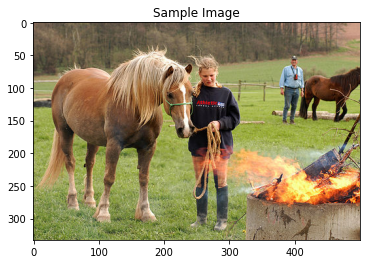

torch.Size([1, 3, 224, 224])
a group of people are standing in a field with a frisbee . 


In [17]:
address = os.path.join(os.getcwd(),'images','horse_girl.jpg')
orig_image, input_image = fetch_image(address)
generate_caption(input_image.reshape(1,3,224,224).to('cuda'))

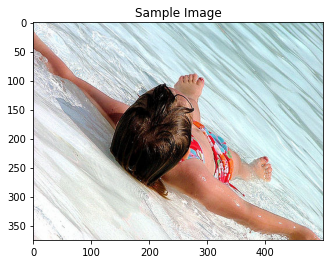

torch.Size([1, 3, 224, 224])
a cat is sitting on a bed with a laptop . 


In [20]:
address = os.path.join(os.getcwd(),'images','child.jpg')
orig_image, input_image = fetch_image(address)
generate_caption(input_image.reshape(1,3,224,224).to('cuda'))

8 BLOCKS

In [22]:
%load_ext autoreload
%autoreload 2
import os
import torch
from model import EncoderCNN, DecoderRNN
encoder_file_8_layers = 'comparative_encoder-1.pkl'
decoder_file_8_layers = 'comparitive_decoder-1.pkl'
encoder = EncoderCNN(embed_size)
encoder.eval()
decoder = DecoderRNN(embed_size, hidden_size, vocab_size)
decoder.eval()
encoder.to(device)
decoder.to(device)
encoder.load_state_dict(torch.load(os.path.join(os.getcwd(),'models', encoder_file_8_layers)))
decoder.load_state_dict(torch.load(os.path.join(os.getcwd(),'models', decoder_file_8_layers)))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
8 1024


<All keys matched successfully>

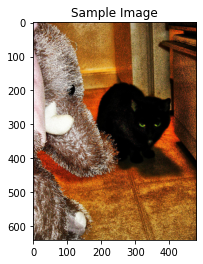

torch.Size([1, 3, 224, 224])
a cat is sitting on a couch next to a stuffed animal . 


In [24]:
address = os.path.join(os.getcwd(),'images','cat.jpg')
orig_image, input_image = fetch_image(address)
generate_caption(input_image.reshape(1,3,224,224).to('cuda'))

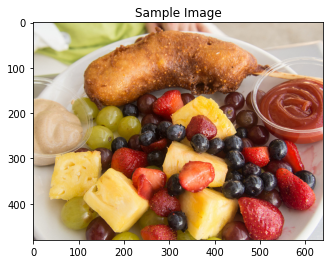

torch.Size([1, 3, 224, 224])
a close up of a plate of food with broccoli 


In [25]:
address = os.path.join(os.getcwd(),'images','fruits.jpg')
orig_image, input_image = fetch_image(address)
generate_caption(input_image.reshape(1,3,224,224).to('cuda'))

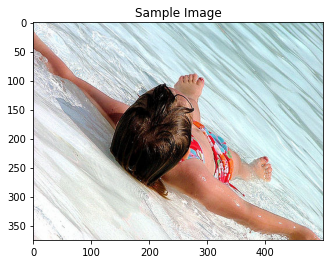

torch.Size([1, 3, 224, 224])
a woman sitting on a bench with a blue umbrella . 


In [26]:
address = os.path.join(os.getcwd(),'images','child.jpg')
orig_image, input_image = fetch_image(address)
generate_caption(input_image.reshape(1,3,224,224).to('cuda'))

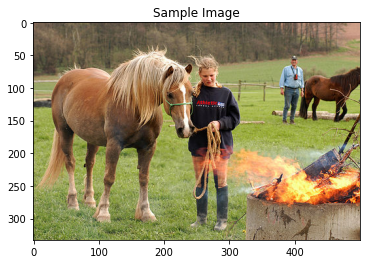

torch.Size([1, 3, 224, 224])
a man and a woman are riding horses . 


In [27]:
address = os.path.join(os.getcwd(),'images','horse_girl.jpg')
orig_image, input_image = fetch_image(address)
generate_caption(input_image.reshape(1,3,224,224).to('cuda'))

9 BLOCKS (FULL NETWORK)

In [30]:
%load_ext autoreload
%autoreload 2
import os
import torch
from model import EncoderCNN, DecoderRNN
encoder_file = 'encoder-1.pkl'
decoder_file = 'decoder-1.pkl'
encoder = EncoderCNN(embed_size)
encoder.eval()
decoder = DecoderRNN(embed_size, hidden_size, vocab_size)
decoder.eval()
encoder.to(device)
decoder.to(device)
encoder.load_state_dict(torch.load(os.path.join(os.getcwd(),'models', encoder_file)))
decoder.load_state_dict(torch.load(os.path.join(os.getcwd(),'models', decoder_file)))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
9 1024


<All keys matched successfully>

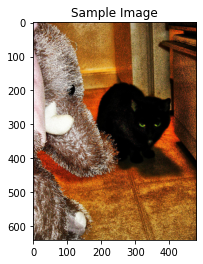

torch.Size([1, 3, 224, 224])
a cat sitting on top of a couch next to a remote control . 


In [32]:
address = os.path.join(os.getcwd(),'images','cat.jpg')
orig_image, input_image = fetch_image(address)
generate_caption(input_image.reshape(1,3,224,224).to('cuda'))

In [39]:
from utils import find_resnet_layer
images = []
layer_name = encoder.resnet._modules['4'][1].conv1
model_dict = dict(type='resnet',arch=encoder.resnet, layer_name=layer_name,input_size=(224,224))
model_GradCAM = GradCAM(model_dict, True)
norm_torch_img.requires_grad = True
# print(norm_torch_img.requires_grad)
mask , logit = model_GradCAM(norm_torch_img)
mask = mask.cpu()
heatmap_t, result_t = visualize_cam(mask,torch_img)
images.append(torch.stack([torch_img.squeeze().cpu(),heatmap_t,result_t],0))
 
images = make_grid(torch.cat(images,0),nrow=5)

Sequential(
  (0): Bottleneck(
    (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (downsample): Sequential(
      (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (1): Bottleneck(
    (conv1): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, ke